In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("./articulos_ml.csv")

In [3]:
data.shape

(161, 8)

In [4]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
data.describe()


,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


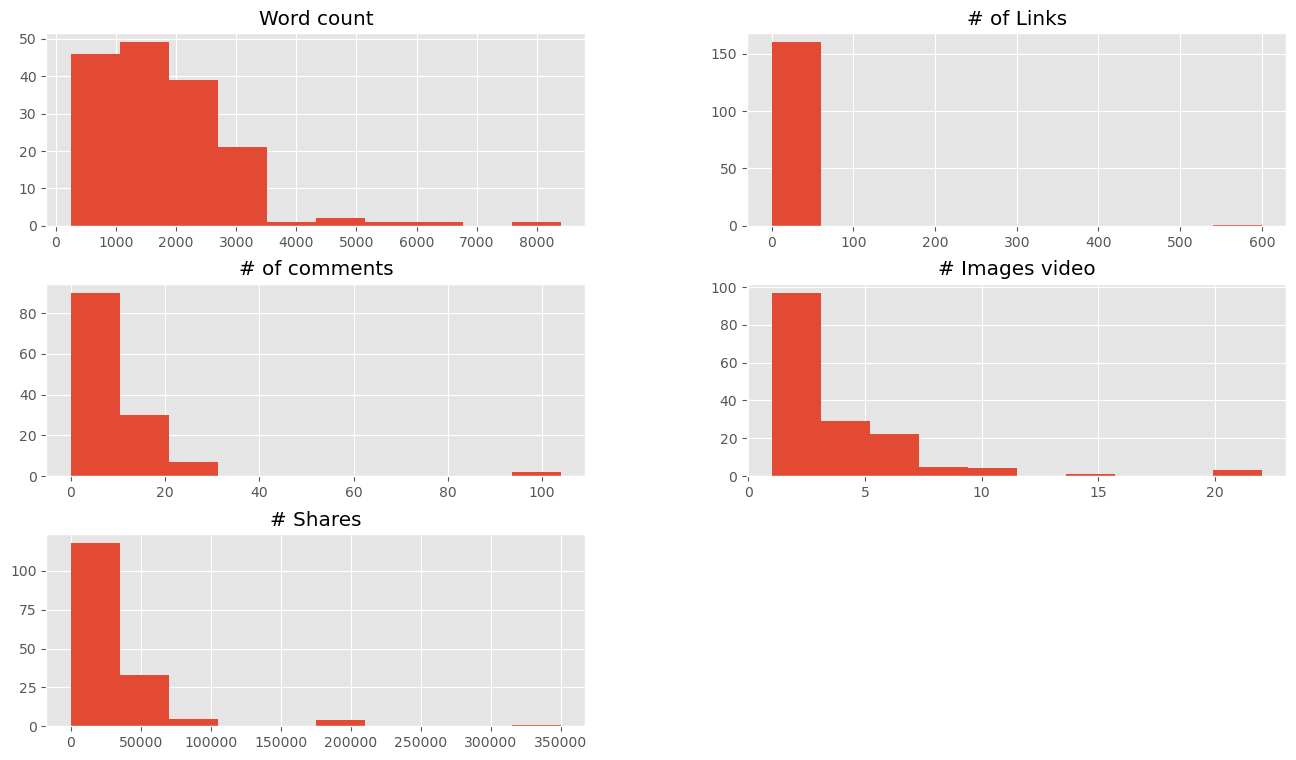

In [6]:
data.drop(['Title','url', 'Elapsed days'],axis=1).hist()
plt.show()

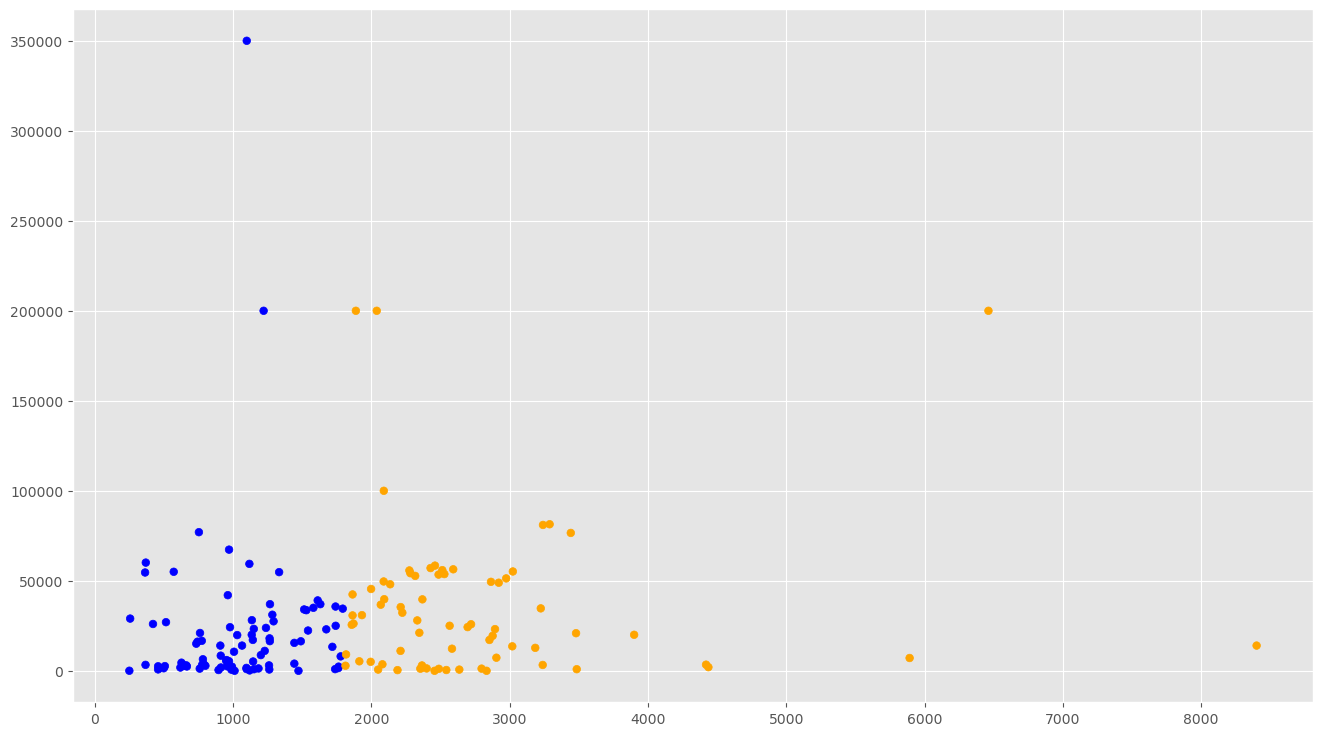

In [8]:
colores=['orange','blue']
tamanios=[30,60]
f1 = data['Word count'].values
f2 = data['# Shares'].values
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

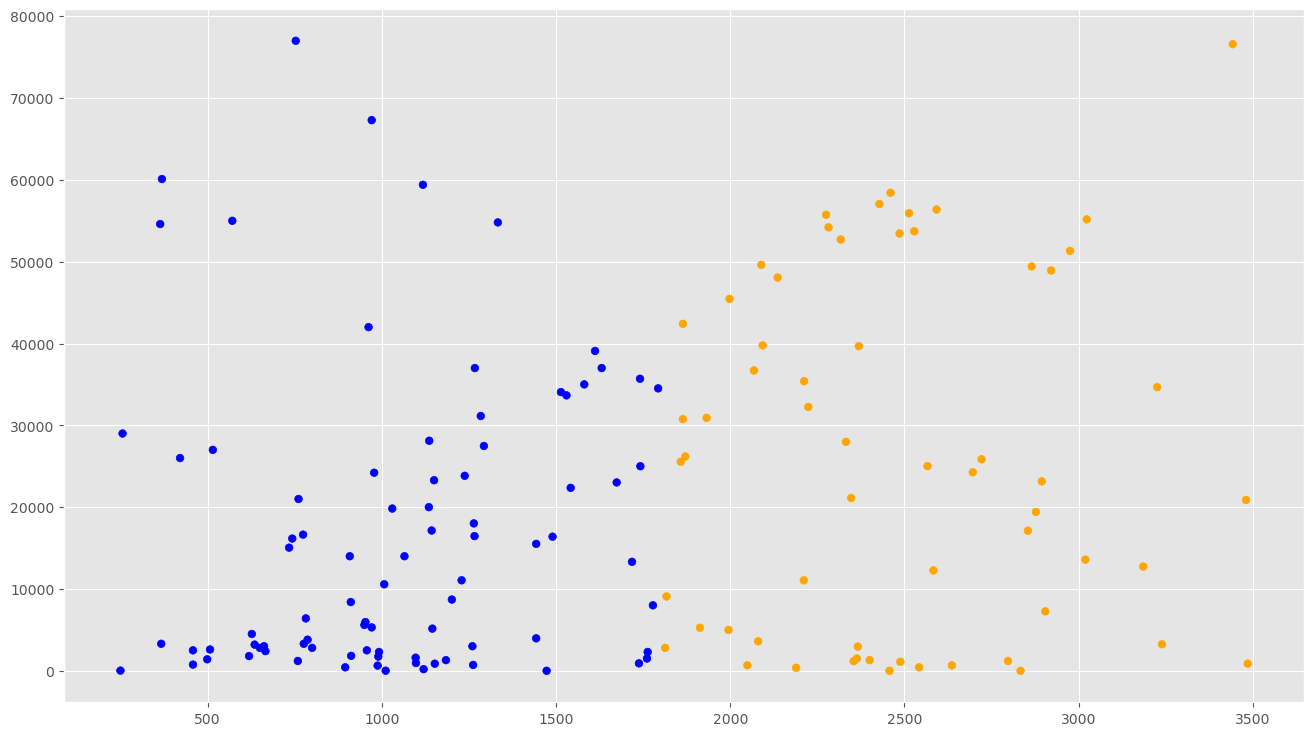

In [9]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [10]:
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


In [11]:
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [12]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


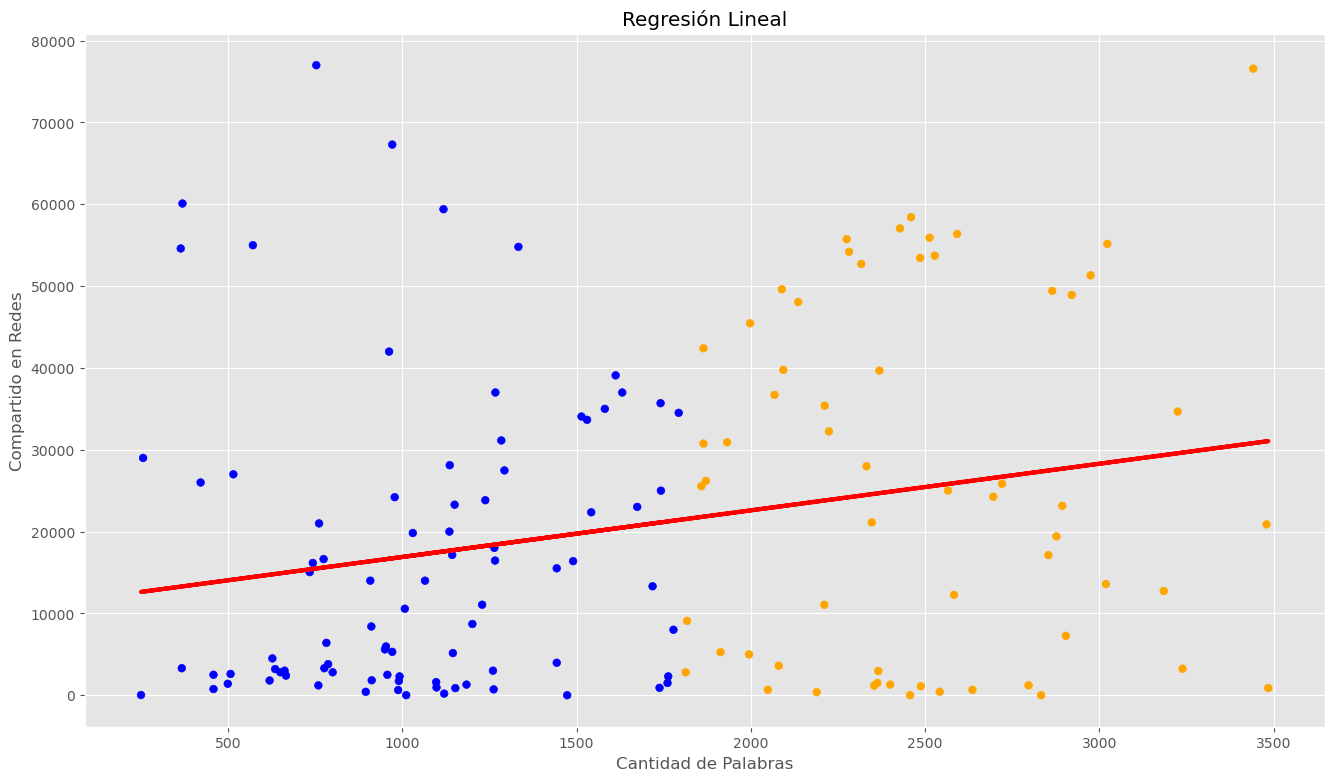

In [13]:
plt.scatter(X_train[:,0], y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')
plt.show()

In [15]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil[0]))

22595


In [ ]:

suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [17]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


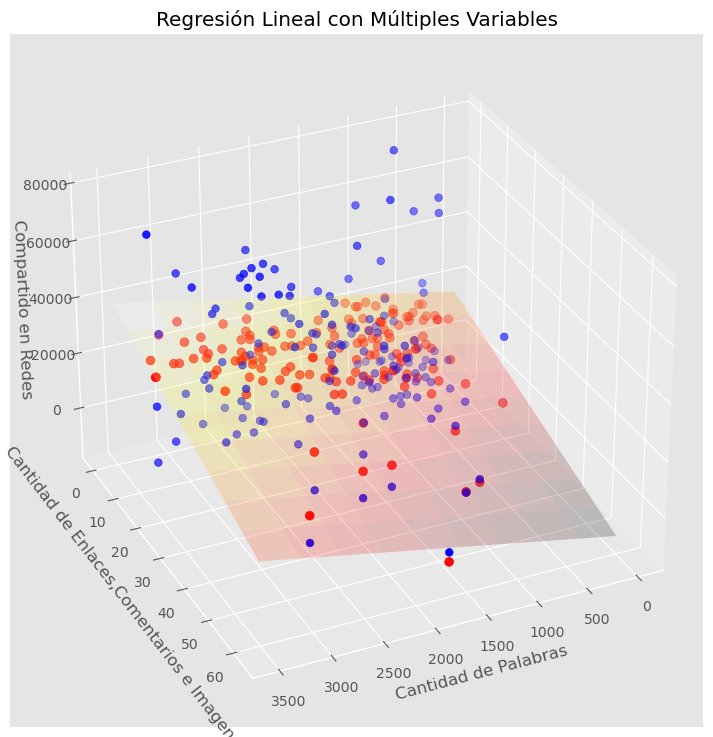

In [18]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
# Graficamos en rojo, los puntos que
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [20]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil[0]))

20518


In [21]:
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)

20765911.860715985


In [22]:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)

0.052615337462582956


In [24]:
diferenciaComparir = z_Dosmil - y_Dosmil
print(int(diferenciaComparir[0]))

-2077


# Respuestas
### 1. ¿Por qué era importante evaluar si existe una relación entre la cantidad de palabras y la cantidad de shares de un artículo?
Es importante porque necesitamos saber si una variable si ayuda a predecir la otra, en ete caso cant. de palabras y cant. de shares. Si no hubiera relacion el modelo no serviria

### 2. Al analizar los histogramas iniciales, ¿qué patrones observaste en la distribución de palabras y shares? ¿Cómo influye esto en la selección del modelo?
Se nota que la gran mayoria de los articulos tienen pocas palabras y pocos shares, casi concentrandose todos al principio de la grafica.Esto fectara al modelo por los valores extremos que contiene, por ende, el filtrar los datos nos ayudara para la regresion lineal

### 3. ¿Qué propósito tuvo filtrar los artículos con menos de 3500 palabras y menos de 80,000 shares? ¿Cómo cambió el comportamiento del modelo después del filtrado?
El proposito fue poder limpiar los datos que nos afectaban el resultado y poder quedarnos con datos mas normales que son la mayoria. Al filtrar el modelo se vuelve mas preciso para el contenido comun.

### 4.¿Por qué crees que había tanta concentración de puntos en estas zonas? ¿Cómo afecta esto al desempeño de la regresión lineal?
Creo que habian muchso datos porque la mayoria escribe articulos con longitud media y unos pocos se vuelven virales. Afecta porque la regresion lineal asume que los datos estan repartidos de forma mas o menos pareja, cualquier punto lejano distorsionara la pendiente.

### 5.En el modelo de regresión simple, ¿qué significa la pendiente del modelo respecto a la relación Word Count → Shares? Explica en tus palabras.
La pendiente nos indica el coeficiente, es cuanto aumentan los shares por cada palabra extra que se escriba.

### 6. El error cuadrático medio (MSE) fue alto en el primer modelo. ¿Qué factores en los datos podrían explicar este resultado?
El MSE fue alto porque los datos reales estan muy dispersos y por valores atipicos.

### 7. Observa el R² obtenido: ¿Crees que la cantidad de palabras es un buen predictor de los shares? ¿Por qué sí o por qué no?
La R^2 nos sale un 0.06, por lo tanto no es un buen predictor, ya que esta lejos del 1. Solo un 6% de los shares se explican por el numero de palabras.

### 8. En los gráficos que distinguen artículos por encima y por debajo de la media (1808 palabras), ¿qué diferencias observaste en la dispersión?
Se puede observar al separarlo por colores que los que tienen articulos mas cortos tienen una dispersion mas alta, en cambio los articulos largos tienden a ser mas consistentes.

### 9. ¿Te parece que la línea de regresión se ajusta bien a los datos? Argumenta basándote en la dispersión.
No se ajusta del todo bien, vemos que en la grfica los puntos no tienen una forma clara a comparacion de la linea que es recta. Al existir puntos lejos de la linea podemos decir que no se ajusta bien.